In [10]:
pip install Cython


In [14]:
pip install --upgrade setuptools<60.0

Note: you may need to restart the kernel to use updated packages.


The system cannot find the file specified.


In [23]:
!pip install prophet

In [84]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load your cleaned training data
train_df = pd.read_csv('train.csv')
train_tar_df=pd.read_csv('train_target.csv')
train_tar_df

,HRFS30D1
0,1.0
1,-1.0
2,-1.0
3,1.0
4,-1.0
...,...
144364,1.0
144365,-1.0
144366,1.0
144367,1.0


In [76]:
import pandas as pd

# Assuming df is your DataFrame
target_variable = 'HRFS30D1'  # Replace with the name of your target variable

# Check the unique values in the target variable
unique_values = train_tar_df[target_variable].unique()

# If the number of unique values is small, it's likely a classification problem
if len(unique_values) <= 10:
    print(f"The target variable '{target_variable}' is likely a classification variable.")
else:
    print(f"The target variable '{target_variable}' is likely a regression variable.")


The target variable 'HRFS30D1' is likely a classification variable.


In [90]:
import pandas as pd

# Load the first dataset
dataset1 = pd.read_csv('train.csv')

# Load the second dataset
dataset2 = pd.read_csv('train_target.csv')

# Concatenate the two datasets horizontally
merged_data = pd.concat([dataset1, dataset2], axis=1)

merged_data

,LOCATION,Country,TRANSACT,Transaction,MEASURE,Measure,TIME,Year,Unit Code,Unit,...,PREXPLF,PREMPNOT,HETSP3O,HESP6,Country_Column_encoded,Transaction_Column_encoded,Measure_Column_encoded,Unit_Column_encoded,PowerCode_Column_encoded,HRFS30D1
0,CAN,Canada,P71,Imports of goods,PVP,Previous year prices and previous year PPPs,2018.0,2018.0,USD,US Dollar,...,1.0,1.0,-1.0,-1.0,7,36,18,32,1,1.0
1,LVA,Latvia,D1VB_E,"Industry, including energy (ISIC rev4)",C,Current prices,2018.0,2018.0,EUR,Euro,...,-1.0,4.0,-1.0,-1.0,32,42,5,12,1,-1.0
2,BGR,Bulgaria,P3S13,Final consumption expenditure of general gover...,VIXOB,Volume index,2016.0,2016.0,IDX,Index,...,-1.0,4.0,-1.0,-1.0,5,21,20,15,0,-1.0
3,ZAF,South Africa,P71,Imports of goods,VPCOB,"Current prices, constant PPPs, OECD base year",2022.0,2022.0,USD,US Dollar,...,-1.0,4.0,-1.0,-1.0,49,36,6,32,1,1.0
4,LUX,Luxembourg,B1GVR_U,Other service activities (ISIC rev4),VP,"Constant prices, previous year prices",2019.0,2019.0,EUR,Euro,...,-1.0,-1.0,-1.0,-1.0,34,49,4,12,1,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144364,TUR,Türkiye,P6,Exports of goods and services,VXCOB,"Current prices, constant exchange rates, OECD ...",2017.0,2017.0,USD,US Dollar,...,-1.0,-1.0,-1.0,-1.0,53,15,7,32,1,1.0
144365,PRT,Portugal,P31S14,Final consumption expenditure of households,VOB,"Constant prices, OECD base year",2021.0,2021.0,EUR,Euro,...,-1.0,-1.0,-1.0,-1.0,42,22,0,12,1,-1.0
144366,SWE,Sweden,P5,Gross capital formation,CPC,"Current prices, current PPPs",2017.0,2017.0,USD,US Dollar,...,-1.0,4.0,-1.0,-1.0,51,26,8,32,1,1.0
144367,BRA,Brazil,P51N1113I,"ICT equipment, SNA08",VXCOB,"Current prices, constant exchange rates, OECD ...",2016.0,2016.0,USD,US Dollar,...,-1.0,4.0,-1.0,-1.0,4,35,7,32,1,1.0


In [91]:

# Assuming 'Year' is your time column and 'HRFS30D1' is your target variable
merged_data.rename(columns={'Year': 'ds'}, inplace=True)
merged_data.rename(columns={'HRFS30D1': 'y'}, inplace=True)
merged_data['ds']

# Assuming 'Year' is your time column and 'HRFS30D1' is your target variable
# Adjust column names accordingly based on your DataFrame
merged_data.rename(columns={'Year': 'ds', 'HRFS30D1': 'y'}, inplace=True)
merged_data['ds'] = pd.to_datetime(merged_data['ds'], format='%Y')
merged_data['ds']

0        2018-01-01
1        2018-01-01
2        2016-01-01
3        2022-01-01
4        2019-01-01
            ...    
144364   2017-01-01
144365   2021-01-01
144366   2017-01-01
144367   2016-01-01
144368   2016-01-01
Name: ds, Length: 144369, dtype: datetime64[ns]

In [92]:

# Assuming 'Year' is your time column and 'HRFS30D1' is your target variable
test_df.rename(columns={'Year': 'ds'}, inplace=True)
test_df.rename(columns={'HRFS30D1': 'y'}, inplace=True)
test_df['ds']

# Assuming 'Year' is your time column and 'HRFS30D1' is your target variable
# Adjust column names accordingly based on your DataFrame
test_df.rename(columns={'Year': 'ds', 'HRFS30D1': 'y'}, inplace=True)
test_df['ds'] = pd.to_datetime(merged_data['ds'], format='%Y')
test_df['ds']

0        2018-01-01
1        2018-01-01
2        2016-01-01
3        2022-01-01
4        2019-01-01
            ...    
144364   2017-01-01
144365   2021-01-01
144366   2017-01-01
144367   2016-01-01
144368   2016-01-01
Name: ds, Length: 144369, dtype: datetime64[ns]

14:26:41 - cmdstanpy - INFO - Chain [1] start processing
14:26:45 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\016775421\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\016775421\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


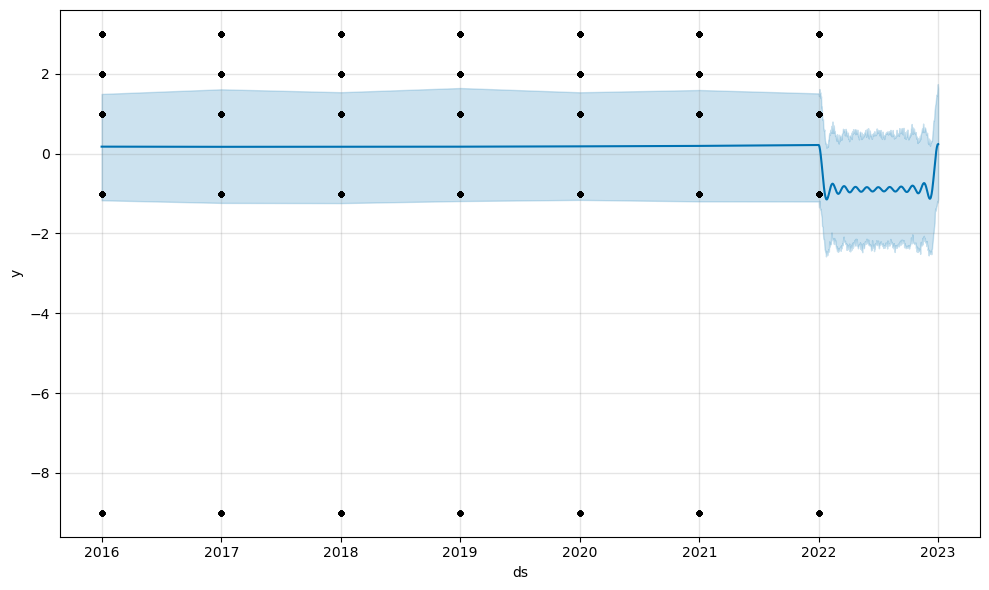

In [93]:

# Initialize and fit the model
model = Prophet()
model.fit(merged_data)

# Create a dataframe with future dates for prediction
# In this example, I'm generating predictions for the next year (365 days)
future = model.make_future_dataframe(periods=365)

# Generate predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.show()


In [48]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Assuming you have a DataFrame df with 'ds' and 'y' columns
# 'ds' represents the timestamp, and 'y' represents the target variable

# Split the data into training and testing sets
#train_size = int(len(df) * 0.8)
#train_df, test_df = df[:train_size], df[train_size:]

# Fit Prophet model
#model = Prophet()
#model.fit(train_df)

# Make predictions on the test set
future = model.make_future_dataframe(periods=len(test_df))
forecast = model.predict(future)
y_pred = forecast['yhat'].tail(len(test_df))

# Convert y_pred to binary classes (you may need to adjust the threshold)
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

# Assuming you have the true labels in test_df['y_true']
y_true = test_df['HRFS30D1']

# Evaluate the classification performance
accuracy = accuracy_score(y_true, y_pred_binary)
classification_rep = classification_report(y_true, y_pred_binary)
conf_matrix = confusion_matrix(y_true, y_pred_binary)

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.27125758457318594
Classification Report:
               precision    recall  f1-score   support

        -9.0       0.00      0.00      0.00        60
        -1.0       0.00      0.00      0.00     20277
         0.0       0.00      0.00      0.00         0
         1.0       0.55      0.49      0.52     26432
         2.0       0.00      0.00      0.00       896
         3.0       0.00      0.00      0.00       459

    accuracy                           0.27     48124
   macro avg       0.09      0.08      0.09     48124
weighted avg       0.30      0.27      0.29     48124

Confusion Matrix:
 [[    0     0    32    28     0     0]
 [    0     0 10431  9846     0     0]
 [    0     0     0     0     0     0]
 [    0     0 13378 13054     0     0]
 [    0     0   471   425     0     0]
 [    0     0   207   252     0     0]]


C:\Users\016775421\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\016775421\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\016775421\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(res

In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score, explained_variance_score, median_absolute_error

# Evaluate the model
mse = mean_squared_error(y_test[seq_length:], y_pred)
mae = mean_absolute_error(y_test[seq_length:], y_pred)
#msle = mean_squared_log_error(y_test[seq_length:], y_pred)
r2 = r2_score(y_test[seq_length:], y_pred)
explained_variance = explained_variance_score(y_test[seq_length:], y_pred)
medae = median_absolute_error(y_test[seq_length:], y_pred)

# Print the results
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
#print(f'Mean Squared Logarithmic Error (MSLE): {msle}')
print(f'R-squared (R2 Score): {r2}')
print(f'Explained Variance Score: {explained_variance}')
print(f'Median Absolute Error (MedAE): {medae}')

NameError: name 'y_test' is not defined

In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, median_absolute_error

# Assuming 'ds' is your time column and 'y' is the target variable
# Replace these column names based on your actual column names
actual_data = merged_data[['ds', 'y']]

# Merge the actual data with the forecast to get the corresponding actual values
merged_forecast = pd.merge(actual_data, forecast[['ds', 'yhat']], on='ds', how='left')

# Extract actual and predicted values
y_actual = merged_forecast['y']
y_pred = merged_forecast['yhat']

# Calculate evaluation metrics
mse = mean_squared_error(y_actual, y_pred)
mae = mean_absolute_error(y_actual, y_pred)
r2 = r2_score(y_actual, y_pred)
evs = explained_variance_score(y_actual, y_pred)
medae = median_absolute_error(y_actual, y_pred)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2 Score): {r2}")
print(f"Explained Variance Score: {evs}")
print(f"Median Absolute Error (MedAE): {medae}")

Mean Squared Error (MSE): 1.1724474876307962
Mean Absolute Error (MAE): 1.0166321730235175
R-squared (R2 Score): 0.0001767719150882474
Explained Variance Score: 0.0001767719184747607
Median Absolute Error (MedAE): 0.8286273184811661


In [96]:
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from sklearn.model_selection import ParameterGrid
import pandas as pd

# Assuming 'merged_data' is your training data
# Replace these column names based on your actual column names
merged_data.rename(columns={'Year': 'ds', 'HRFS30D1': 'y'}, inplace=True)

# Parameter grid for hyperparameter tuning
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1],
    'seasonality_prior_scale': [0.01, 0.1, 1.0],
    'holidays_prior_scale': [0.01, 0.1, 1.0],
    # Add more parameters as needed
}

# Convert your 'ds' column to datetime if it's not already
merged_data['ds'] = pd.to_datetime(merged_data['ds'])

# Initialize an empty list to store results
results_list = []
i=0
# Iterate through parameter combinations
for params in ParameterGrid(param_grid):
    i+=1
    print(f"Training with parameters: {params}")
    
    # Initialize and fit the model
    model = Prophet(**params)
    model.fit(merged_data)
    
    # Perform cross-validation
    df_cv = cross_validation(model, horizon='365 days')
    
    # Calculate performance metrics
    df_metrics = performance_metrics(df_cv)
    
    # Append results to the list
    results_list.append(df_metrics.mean())
    if (i==5):
        break

# Create a DataFrame from the list of results
results_df = pd.concat(results_list, axis=1).transpose()

# Print the results
print(results_df)


Training with parameters: {'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.01, 'seasonality_prior_scale': 0.01}


15:27:36 - cmdstanpy - INFO - Chain [1] start processing
15:27:48 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

15:28:00 - cmdstanpy - INFO - Chain [1] start processing
15:28:05 - cmdstanpy - INFO - Chain [1] done processing
15:28:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
15:28:12 - cmdstanpy - INFO - Chain [1] start processing
15:36:03 - cmdstanpy - INFO - Chain [1] done processing
15:36:23 - cmdstanpy - INFO - Chain [1] start processing
15:36:28 - cmdstanpy - INFO - Chain [1] done processing
15:36:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
15:36:37 - cmdstanpy - INFO - Chain [1] start processing
15:44:00 - cmdstanpy - INFO - Chain [1] done processing
15:44:25 - cmdstanpy - INFO - Chain [1] start processing
15:44:29 - cmdstanpy - INFO - Chain [1] done processing
15:44:58 - cmdstanpy - INFO - Chain [1] start processing
15:45:02 - cmdstanpy - INFO - Chain [1] done processing
15:45:34 -

Training with parameters: {'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.01, 'seasonality_prior_scale': 0.1}


15:46:33 - cmdstanpy - INFO - Chain [1] start processing
15:46:47 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

15:47:01 - cmdstanpy - INFO - Chain [1] start processing
15:47:08 - cmdstanpy - INFO - Chain [1] done processing
15:47:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
15:47:18 - cmdstanpy - INFO - Chain [1] start processing
16:01:40 - cmdstanpy - INFO - Chain [1] done processing
16:02:03 - cmdstanpy - INFO - Chain [1] start processing
16:02:09 - cmdstanpy - INFO - Chain [1] done processing
16:02:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:02:19 - cmdstanpy - INFO - Chain [1] start processing
16:15:21 - cmdstanpy - INFO - Chain [1] done processing
16:15:44 - cmdstanpy - INFO - Chain [1] start processing
16:15:53 - cmdstanpy - INFO - Chain [1] done processing
16:16:14 - cmdstanpy - INFO - Chain [1] start processing
16:16:23 - cmdstanpy - INFO - Chain [1] done processing
16:16:47 -

Training with parameters: {'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.01, 'seasonality_prior_scale': 1.0}


16:17:33 - cmdstanpy - INFO - Chain [1] start processing
16:17:40 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

16:17:54 - cmdstanpy - INFO - Chain [1] start processing
16:17:58 - cmdstanpy - INFO - Chain [1] done processing
16:17:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:18:07 - cmdstanpy - INFO - Chain [1] start processing
16:23:44 - cmdstanpy - INFO - Chain [1] done processing
16:24:07 - cmdstanpy - INFO - Chain [1] start processing
16:24:12 - cmdstanpy - INFO - Chain [1] done processing
16:24:12 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:24:22 - cmdstanpy - INFO - Chain [1] start processing
16:28:52 - cmdstanpy - INFO - Chain [1] done processing
16:29:15 - cmdstanpy - INFO - Chain [1] start processing
16:29:26 - cmdstanpy - INFO - Chain [1] done processing
16:29:56 - cmdstanpy - INFO - Chain [1] start processing
16:30:09 - cmdstanpy - INFO - Chain [1] done processing
16:30:37 -

Training with parameters: {'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.1, 'seasonality_prior_scale': 0.01}


16:31:38 - cmdstanpy - INFO - Chain [1] start processing
16:31:53 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

16:32:06 - cmdstanpy - INFO - Chain [1] start processing
16:32:11 - cmdstanpy - INFO - Chain [1] done processing
16:32:11 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:32:22 - cmdstanpy - INFO - Chain [1] start processing
16:40:46 - cmdstanpy - INFO - Chain [1] done processing
16:41:07 - cmdstanpy - INFO - Chain [1] start processing
16:41:13 - cmdstanpy - INFO - Chain [1] done processing
16:41:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:41:23 - cmdstanpy - INFO - Chain [1] start processing
16:49:54 - cmdstanpy - INFO - Chain [1] done processing
16:50:16 - cmdstanpy - INFO - Chain [1] start processing
16:50:20 - cmdstanpy - INFO - Chain [1] done processing
16:50:41 - cmdstanpy - INFO - Chain [1] start processing
16:50:44 - cmdstanpy - INFO - Chain [1] done processing
16:51:08 -

Training with parameters: {'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.1, 'seasonality_prior_scale': 0.1}


16:51:58 - cmdstanpy - INFO - Chain [1] start processing
16:52:09 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/5 [00:00<?, ?it/s]

16:52:21 - cmdstanpy - INFO - Chain [1] start processing
16:52:26 - cmdstanpy - INFO - Chain [1] done processing
16:52:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:52:35 - cmdstanpy - INFO - Chain [1] start processing
17:06:14 - cmdstanpy - INFO - Chain [1] done processing
17:06:37 - cmdstanpy - INFO - Chain [1] start processing
17:06:44 - cmdstanpy - INFO - Chain [1] done processing
17:06:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:06:54 - cmdstanpy - INFO - Chain [1] start processing
17:17:39 - cmdstanpy - INFO - Chain [1] done processing
17:17:55 - cmdstanpy - INFO - Chain [1] start processing
17:18:05 - cmdstanpy - INFO - Chain [1] done processing
17:18:20 - cmdstanpy - INFO - Chain [1] start processing
17:18:31 - cmdstanpy - INFO - Chain [1] done processing
17:18:47 -

             horizon       mse      rmse       mae      mape     mdape  \
0  273 days 06:00:00  1.176901  1.084838  1.020195  0.976591  0.846195   
1  273 days 06:00:00  1.177092  1.084926  1.020428  0.976803  0.848673   
2  273 days 06:00:00  1.177091  1.084925  1.020337  0.976725  0.846849   
3  273 days 06:00:00  1.176901  1.084838  1.020195  0.976591  0.846195   
4  273 days 06:00:00  1.177092  1.084926  1.020428  0.976803  0.848673   

      smape  coverage  
0  1.687453  0.970501  
1  1.690168  0.970548  
2  1.688832  0.970472  
3  1.687453  0.970518  
4  1.690168  0.970523  


In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, median_absolute_error

# Assuming 'ds' is your time column and 'y' is the target variable
# Replace these column names based on your actual column names
actual_data = results_df[['ds', 'y']]

# Merge the actual data with the forecast to get the corresponding actual values
merged_forecast = pd.merge(actual_data, forecast[['ds', 'yhat']], on='ds', how='left')

# Extract actual and predicted values
y_actual = merged_forecast['y']
y_pred = merged_forecast['yhat']

# Calculate evaluation metrics
mse = mean_squared_error(y_actual, y_pred)
mae = mean_absolute_error(y_actual, y_pred)
r2 = r2_score(y_actual, y_pred)
evs = explained_variance_score(y_actual, y_pred)
medae = median_absolute_error(y_actual, y_pred)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2 Score): {r2}")
print(f"Explained Variance Score: {evs}")
print(f"Median Absolute Error (MedAE): {medae}")

KeyError: "None of [Index(['ds', 'y'], dtype='object')] are in the [columns]"

C:\Users\016775421\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\016775421\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


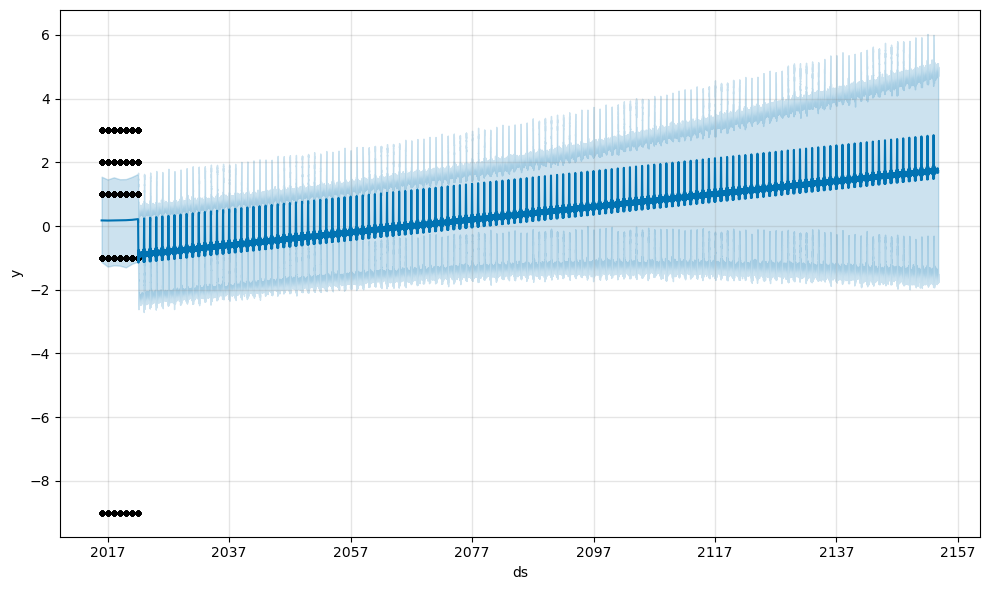

In [27]:
import matplotlib.pyplot as plt
from prophet.plot import plot

# Assuming you have the original dataframe df and the Prophet model is stored in 'model'
future = model.make_future_dataframe(periods=len(test_df))
forecast = model.predict(future)

fig = plot(model, forecast)
plt.show()

C:\Users\016775421\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\016775421\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:349: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\016775421\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:352: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects inste

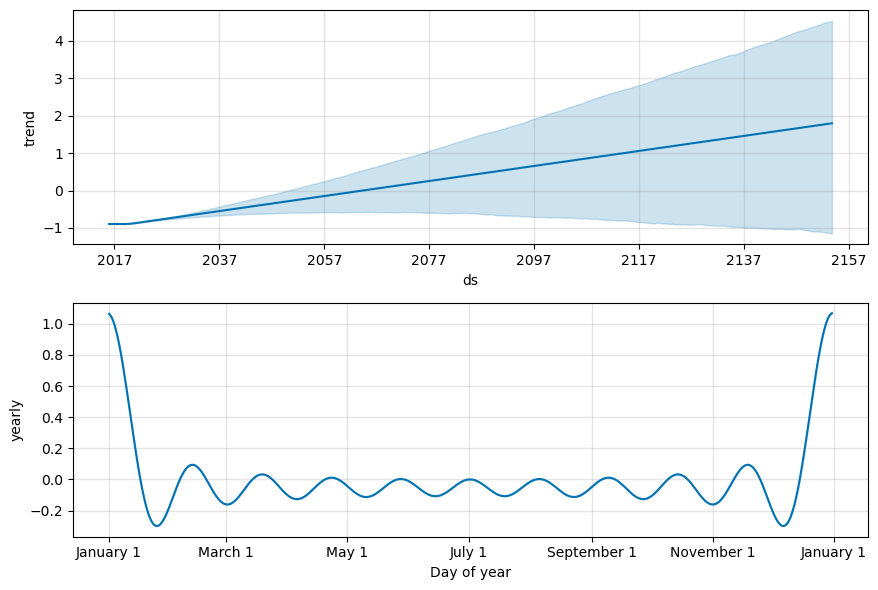

In [28]:
fig = model.plot_components(forecast)
plt.show()

C:\Users\016775421\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\016775421\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


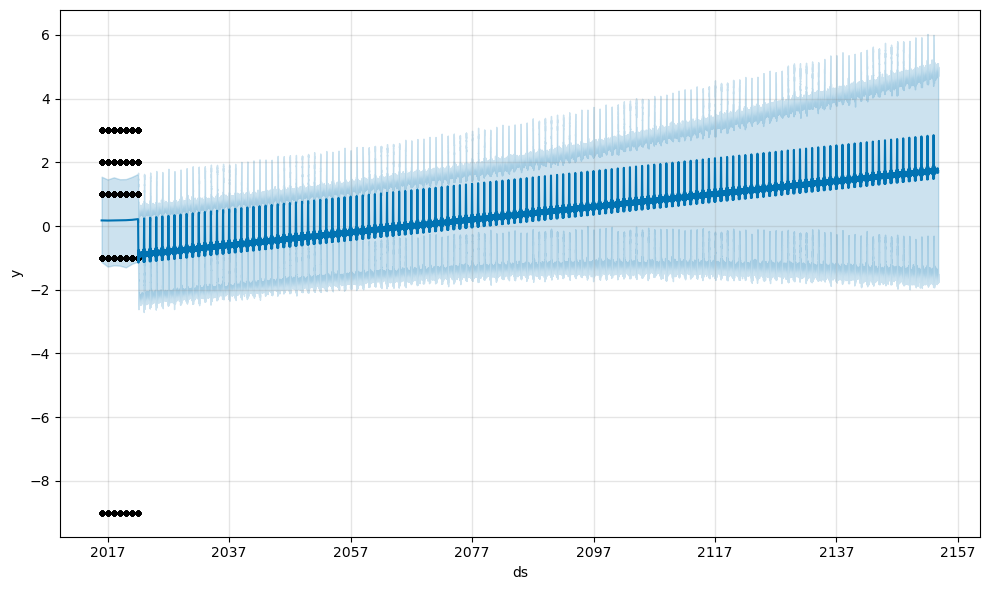

In [29]:
fig = plot(model, forecast, uncertainty=True)
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, median_absolute_error

# Assuming 'ds' is your time column and 'y' is the target variable
# Replace these column names based on your actual column names
actual_data = merged_data[['ds', 'y']]

# Merge the actual data with the forecast to get the corresponding actual values
merged_forecast = pd.merge(actual_data, forecast[['ds', 'yhat']], on='ds', how='left')

# Extract actual and predicted values
y_actual = merged_forecast['y']
y_pred = merged_forecast['yhat']

# Calculate evaluation metrics
mse = mean_squared_error(y_actual, y_pred)
mae = mean_absolute_error(y_actual, y_pred)
r2 = r2_score(y_actual, y_pred)
evs = explained_variance_score(y_actual, y_pred)
medae = median_absolute_error(y_actual, y_pred)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2 Score): {r2}")
print(f"Explained Variance Score: {evs}")
print(f"Median Absolute Error (MedAE): {medae}")

Mean Squared Error (MSE): 1.1724474876307962
Mean Absolute Error (MAE): 1.0166321730235175
R-squared (R2 Score): 0.0001767719150882474
Explained Variance Score: 0.0001767719184747607
Median Absolute Error (MedAE): 0.8286273184811661


C:\Users\016775421\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\016775421\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


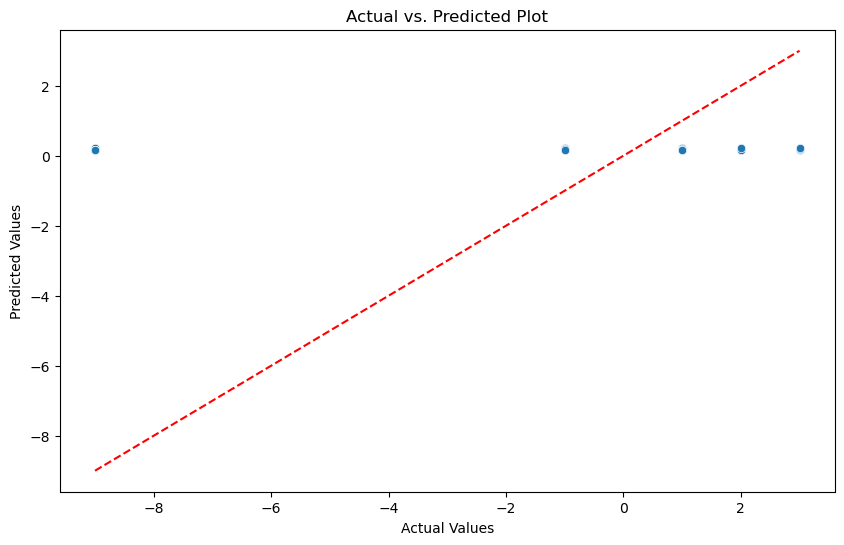

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_actual, y=y_pred)
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], linestyle='--', color='r')
plt.title('Actual vs. Predicted Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

C:\Users\016775421\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\016775421\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


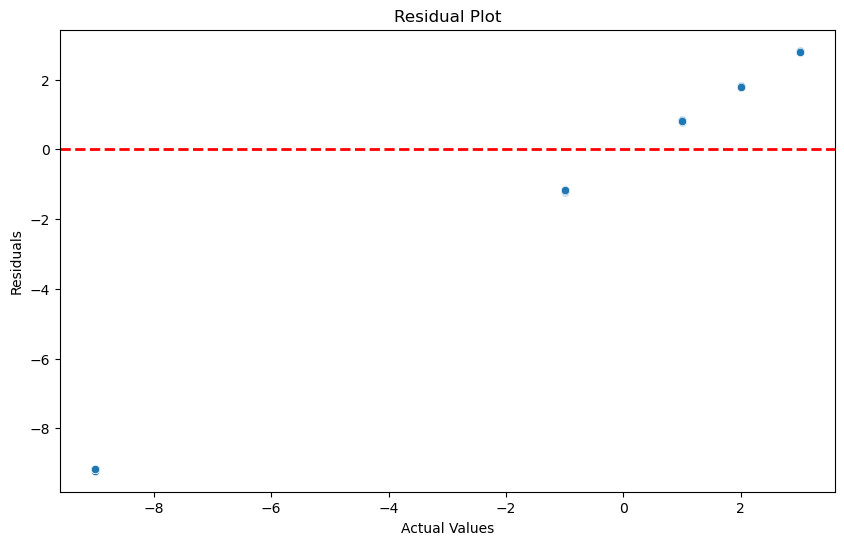

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_actual, y=y_actual - y_pred)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

C:\Users\016775421\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\016775421\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


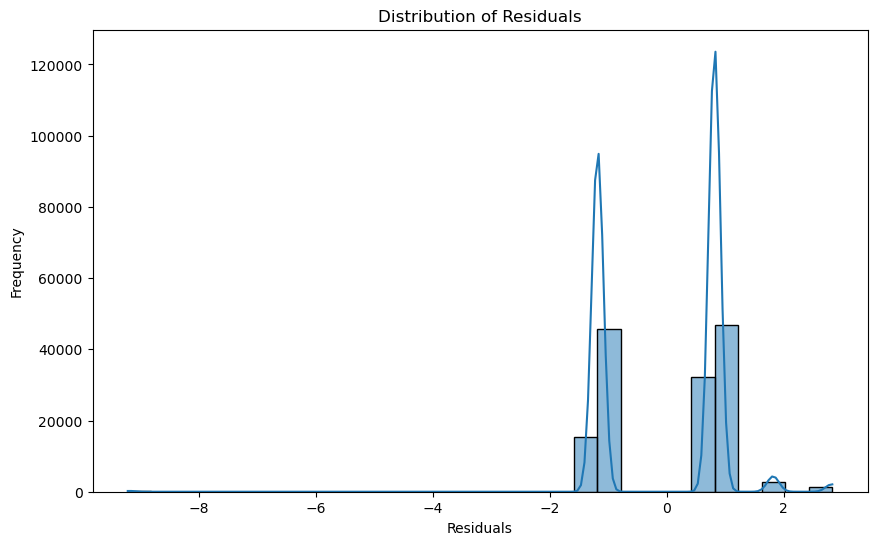

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(y_actual - y_pred, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

Mean Squared Error (MSE): 1.1724474876307962
Mean Absolute Error (MAE): 1.0166321730235175
R-squared (R2 Score): 0.0001767719150882474
Explained Variance Score: 0.0001767719184747607
Median Absolute Error (MedAE): 0.8286273184811661


C:\Users\016775421\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\016775421\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\016775421\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\016775421\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future

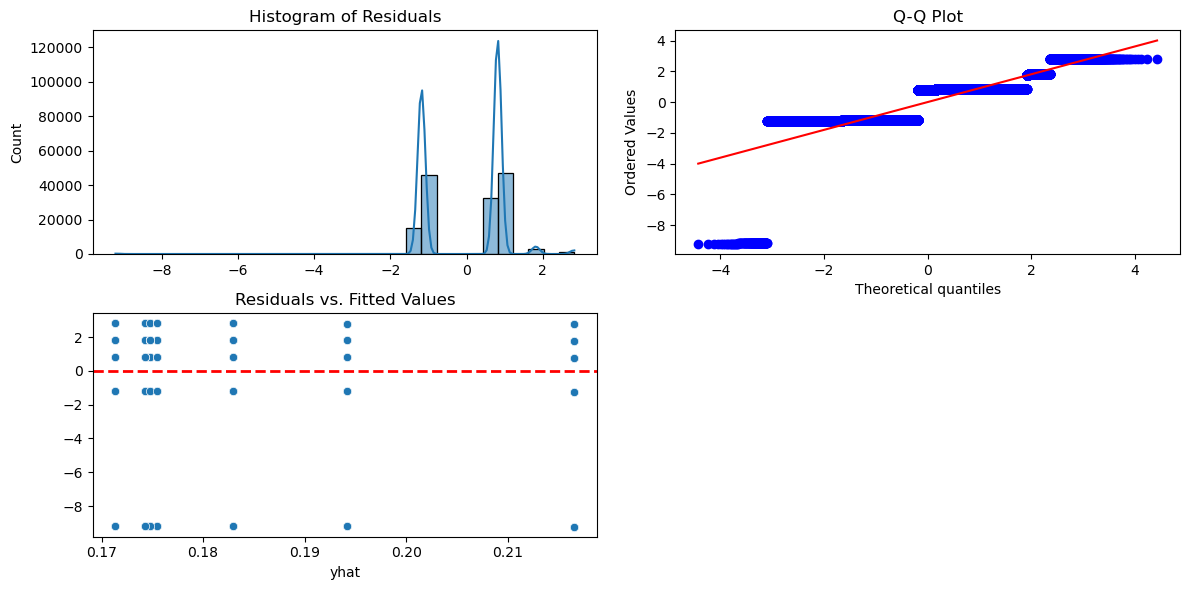

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'ds' is your time column and 'y' is the target variable
# Replace these column names based on your actual column names
actual_data = merged_data[['ds', 'y']]

# Merge the actual data with the forecast to get the corresponding actual values
merged_forecast = pd.merge(actual_data, forecast[['ds', 'yhat']], on='ds', how='left')

# Extract actual and predicted values
y_actual = merged_forecast['y']
y_pred = merged_forecast['yhat']

# Calculate residuals
residuals = y_actual - y_pred

# Print the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2 Score): {r2}")
print(f"Explained Variance Score: {evs}")
print(f"Median Absolute Error (MedAE): {medae}")

# Visualize residuals
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(2, 2, 1)
sns.histplot(residuals, bins=30, kde=True)
plt.title('Histogram of Residuals')

# Q-Q Plot
plt.subplot(2, 2, 2)
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')

# Residuals vs. Fitted Values Plot
plt.subplot(2, 2, 3)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residuals vs. Fitted Values')

plt.tight_layout()
plt.show()

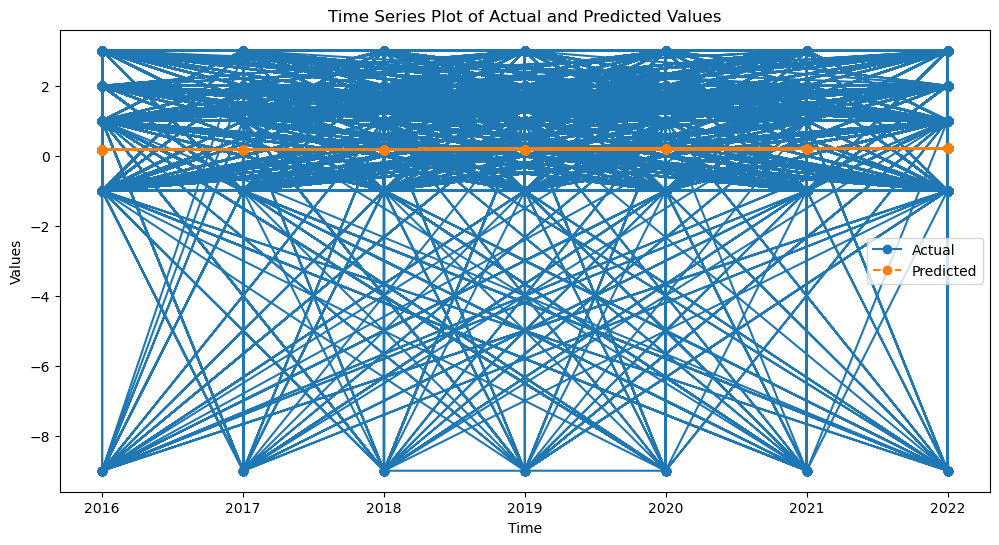

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(merged_forecast['ds'], merged_forecast['y'], label='Actual', marker='o')
plt.plot(merged_forecast['ds'], merged_forecast['yhat'], label='Predicted', linestyle='--', marker='o')
plt.title('Time Series Plot of Actual and Predicted Values')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()